# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from tensorflow import keras
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Data Loading

In [ ]:
df = pd.read_csv("churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Checking Column Names

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Checking Missing Values 

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Description

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Customer Churn Count

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Visualization of The Count of Customer Churn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


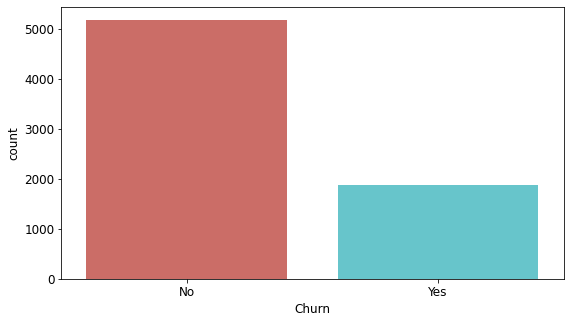

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(df['Churn'], palette='hls')

# Visualization Of Left Customer Percentage

In [ ]:
Retained = df[df.Churn == 'No'].shape[0]
Churned = df[df.Churn == 'Yes'].shape[0]

# Percentage of staying customers
print(Retained/(Retained + Churned) * 100,'% of customers are staying in the company')

# Percentage of left customers
print(Churned/(Retained + Churned) * 100, '% of customers are leaving from the company')

73.4630129206304 % of customers are staying in the company
26.536987079369588 % of customers are leaving from the company


Text(0.5, 1.0, 'Percentage of Reatined & Churned Customers')

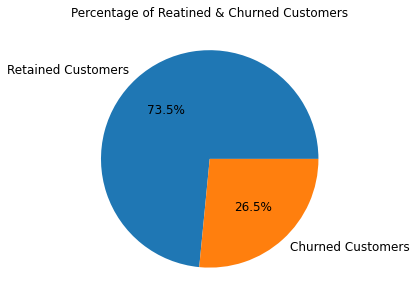

In [ ]:
# Visualizing the churn customers percentage 
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Retained Customers', 'Churned Customers'],figsize =(15,5), fontsize = 12 )                                                                          
 
ax.set_ylabel('',fontsize = 12)
ax.set_title('Percentage of Reatined & Churned Customers', fontsize = 12)

# Visualization Of Senior Citizen Percentage

Text(0.5, 1.0, 'Percentage of Senior Citizens')

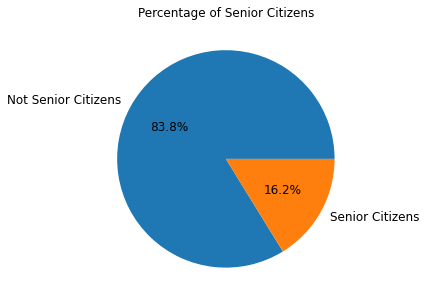

In [ ]:
# Visualizing the senior citizen percentage
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Not Senior Citizens', 'Senior Citizens'],figsize =(15,5), fontsize = 12 )                                                                          
 
ax.set_ylabel('',fontsize = 12)
ax.set_title('Percentage of Senior Citizens', fontsize = 12)

# Visualization Of The Churn Count For Males and Females

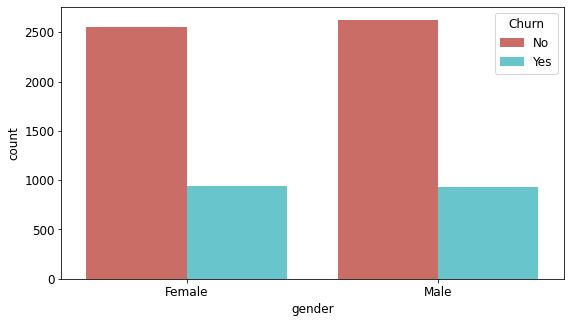

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x ='gender', hue='Churn', data=df, palette='hls')

# Visualization Of The Churn Count For Tech Supoort

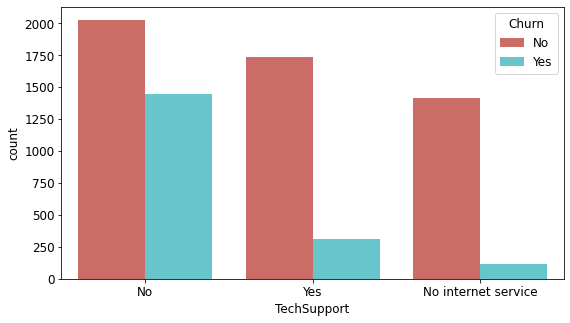

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x ='TechSupport', hue='Churn', data=df, palette='hls')

# Visualization Of The Churn Count For Internet Service

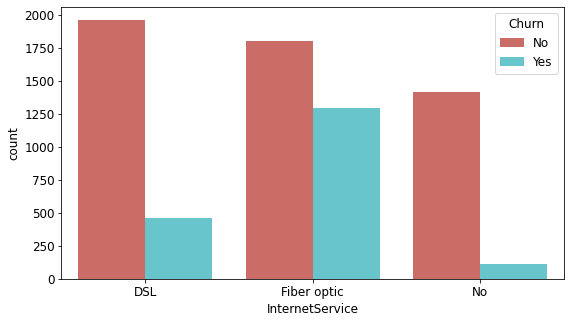

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='hls')

# Visualization Of The Numeric Data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5de7496650>,
      dtype=object)

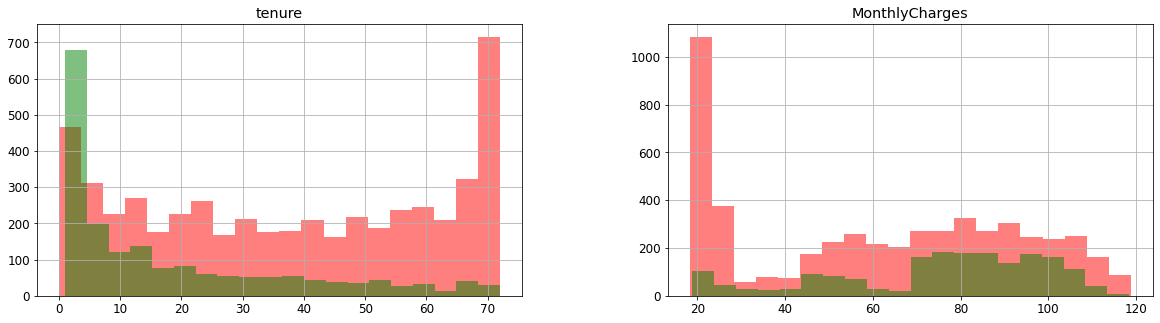

In [ ]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(20, 5))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='red', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='green', alpha=0.5, ax=ax)

# Removing Unnecessary columns Columns

In [ ]:
cleanDF = df.drop('customerID', axis=1)

# Converting All The Non-numeric Columns to Numeric

In [ ]:
# Converting all the string data into numeric data by using of Label Encoder 
for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cleanDF.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [ ]:
cleanDF.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,2609,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3022,0


# Data Scaling & Splitting

In [ ]:
# Scaling data in x and y
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

In [ ]:
# Splitting the data into 80% for training and 20% for testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# Logistic Regression Model 

In [ ]:
# Model training 
LR_model = LogisticRegression()
LR_model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
# Predictions on the test data
LR_predictions = LR_model.predict(xtest)

# Printing the predictions
print(LR_predictions)

[1 0 0 ... 0 0 0]


In [ ]:
# Checking the Precision, Recall and F1-score
print(classification_report(ytest, LR_predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
# Storing accuracy in a variable and printing accuracy score of Logistic Regression Model
score = accuracy_score(LR_predictions,ytest)
print(score, '% of accuracy in Logistic Regression Model')

0.8161816891412349 % of accuracy in Logistic Regression Model


In [ ]:
# Calculating the MSE with sklearn for Logistic Regression Model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, LR_predictions)
print(mse)

0.18381831085876507


In [ ]:
# Calculating the MAE with sklearn for Logistic Regression Model
from sklearn.metrics import mean_absolute_error
mae = (mean_absolute_error(ytest, LR_predictions))
print(mae)

0.18381831085876507


I have applied 3 Machine Learning Models in this dataset including Deep Neural Network (DNN). However, the best performing model is Logistic Regression Model with approximate 81% of accuracy. So, I have figured 4 graphs of this model. 

1. Plotting Sigmoid Function 
2. Visualizing Confusion Matrix 
3. Visualizing ROC Curve 
4. Plotting Histogram of Predicted Probabilities

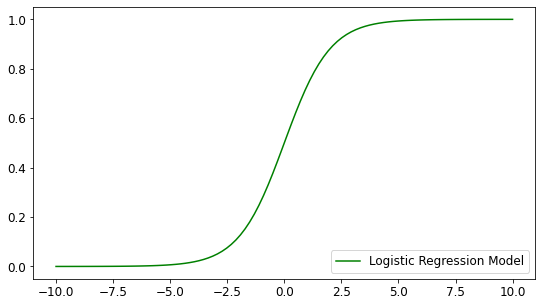

In [ ]:
# Plotting Sigmoid Function of Logistic Regression Model 
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.figure(figsize=(9,5))
plt.plot(x, y, 'r-', label='Logistic Regression Model', color='green')
plt.legend(loc='lower right')
plt.savefig('Log_Sig')

In [ ]:
# Creating Confusion Metrics for Logistic Regression Model 
cm = metrics.confusion_matrix(ytest, LR_predictions)
print(cm)

[[940  96]
 [163 210]]


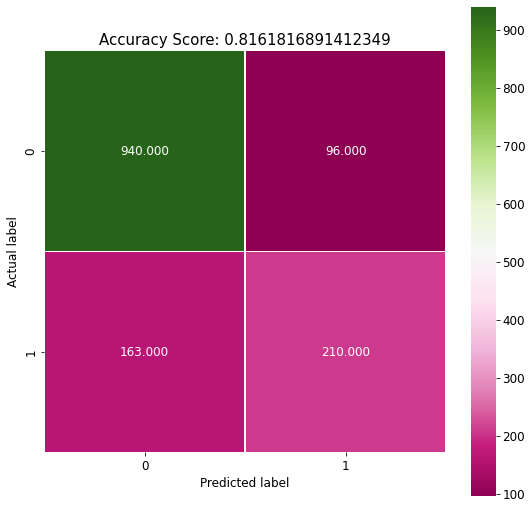

In [ ]:
# Visualizing Confusion Metrics of Logistic Regression Model 
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PiYG');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('Log_CM')

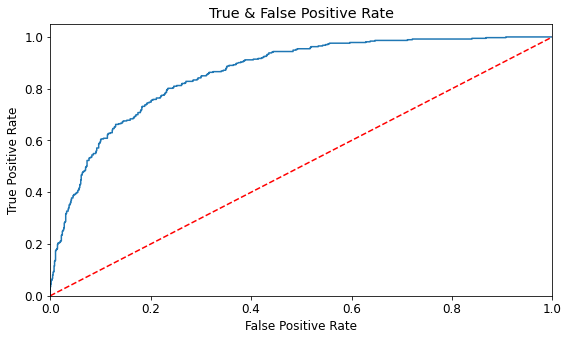

In [ ]:
# Visualizing ROC Curve 
logit_roc_auc = roc_auc_score(ytest, LR_model.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, LR_model.predict_proba(xtest)[:,1])
plt.figure(figsize=(9,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('True & False Positive Rate')
plt.savefig('Log_ROC')
plt.show()

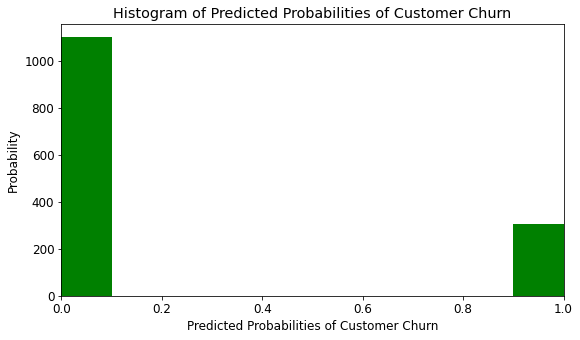

In [ ]:
# Plotting Histogram of Predicted Probabilities
plt.figure(figsize=(9,5))
plt.rcParams['font.size'] = 12
plt.hist(LR_predictions, bins = 10, color='green')
plt.title('Histogram of Predicted Probabilities of Customer Churn')
plt.xlim(0,1)
plt.xlabel('Predicted Probabilities of Customer Churn')
plt.ylabel('Probability')
plt.savefig('Log_Prob')

# Random Forest Classifier Model 

In [ ]:
# Model training 
RFC_model = RandomForestClassifier(random_state=45)
RFC_model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=45)

In [ ]:
# Predictions on the test data
RFC_predictions = RFC_model.predict(xtest)

# Printing the predictions
print(RFC_predictions)

[1 0 0 ... 0 0 0]


In [ ]:
# Checking the Precision, Recall and F1-score
print(classification_report(ytest, RFC_predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# Printing accuracy score from Random Forest Classifier Model
print(accuracy_score(RFC_predictions,ytest),'% of accuracy in Random Forest Classifier Model')

0.8005677785663591 % of accuracy in Random Forest Classifier Model


In [ ]:
# Creating Confusion Metrics for Random Classifier Model 
cm = metrics.confusion_matrix(ytest, RFC_predictions)
print(cm)

[[948  88]
 [193 180]]


In [ ]:
# Calculating the MSE with sklearn for Random Forest Classifier Model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, RFC_predictions)
print(mse)

0.1994322214336409


In [ ]:
# Calculating the MAE with sklearn for Random Forest Classifier Model
from sklearn.metrics import mean_absolute_error
mae = (mean_absolute_error(ytest, RFC_predictions))
print(mae)

0.1994322214336409


# Deep Neural Network (DNN) Model

In [ ]:
# Defining the sequential model
DNN_model = keras.Sequential([
    
    # Input Layer (using relu)
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),

    # Output Layer (Sigmoid for binary output)
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [ ]:
# Model Compiling 
DNN_model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# Model Fitting 
DNN_model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.5032 - accuracy: 0.7469
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.7856
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.7975
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8007
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8035
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8044
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8042
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8085
Epoch 9/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8078
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4060 - accura

In [ ]:
# Model Evaluation 
DNN_model.evaluate(xtest,ytest)

45/45 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7764


[0.49090832471847534, 0.7764371633529663]

In [ ]:
# Predicting Churn Values 
DNN_predictions = DNN_model.predict(xtest)
print(DNN_predictions)

45/45 [==============================] - 0s 1ms/step
[[0.6163283 ]
 [0.02997178]
 [0.00108846]
 ...
 [0.11222412]
 [0.02583708]
 [0.29230216]]


In [ ]:
# Unscaling the predicted values 
DNN_predictions_lis = []
for i in DNN_predictions:
    if i>0.5:
        DNN_predictions_lis.append(1)
    else:
        DNN_predictions_lis.append(0)
print(DNN_predictions_lis)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Making dataframe for comparing the orignal values and the predicted values
data = {'Orignal Churn Values':ytest, 'Predicted Churn Values':DNN_predictions_lis}
df_check = pd.DataFrame(data)
df_check.head(5)

,Orignal Churn Values,Predicted Churn Values
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0


In [ ]:
# Printing classification report for checking the performance metrics 
print(classification_report(ytest,DNN_predictions_lis))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.58      0.56      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409



Text(111.0, 0.5, 'True number')

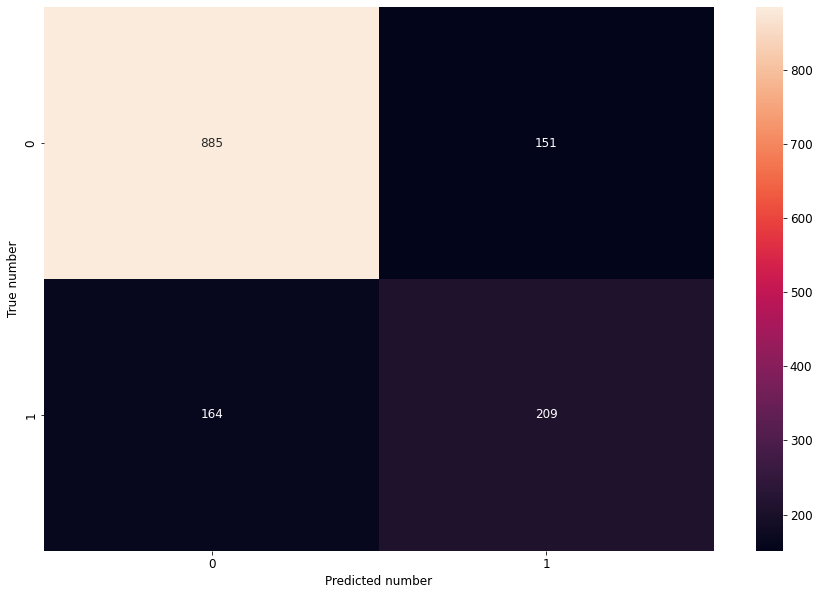

In [ ]:
# Ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=DNN_predictions_lis)
plt.figure(figsize = (15,10))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted number')
plt.ylabel('True number')

In [ ]:
# Printing accuracy score from Deep Neural Network (DNN) Model
print(accuracy_score(DNN_predictions_lis,ytest),'% of accuracy in DNN Model')

0.7764371894960965 % of accuracy in DNN Model


In [ ]:
# Calculating the MSE with sklearn for DNN Model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, DNN_predictions)
print(mse)

0.1554108554548823


In [ ]:
# Calculating the MAE with sklearn for DNN Model
from sklearn.metrics import mean_absolute_error
mae = (mean_absolute_error(ytest, DNN_predictions))
print(mae)

0.2680057794322324
